## Project Understanding

The Dataset is an extract from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

This analysis seeks to answer the following Key Questions:

1- Trend of Terrror attacks over the years

2- Attack type per Nationality of victims

3- Attack type per Group targeted

4- correlation analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading and Understanding

In [59]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.tar.bz2", compression="bz2")
df.head()

<ipython-input-59-2026e7418ac6>:1: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/globalterrorismdb_0718dist.tar.bz2", compression="bz2")


,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 136)

In [4]:
df.columns

Index(['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'approxdate',
       'extended', 'resolution', 'country', 'country_txt',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=136)

## Subseting the data frame to necessary columns

In [6]:
columns = ["success", "suicide", "attacktype1", "attacktype1_txt", "targtype1_txt", "targsubtype1_txt", "target1", "natlty1_txt", "gname","gsubname" , "nperps", "weaptype1_txt", "weapsubtype1_txt", "nkill", "nkillus"]
new_df = df[columns]
new_df.head()

,success,suicide,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
0,1,0,1,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1.0,NaN
1,1,0,6,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,Unknown,NaN,0.0,NaN
2,1,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,Unknown,NaN,1.0,NaN
3,1,0,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN
4,1,0,7,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN


In [7]:
new_df.shape

(181691, 15)

In [8]:
new_df.isnull().sum()

success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                636
natlty1_txt           1559
gname                    0
gsubname            175801
nperps               71115
weaptype1_txt            0
weapsubtype1_txt     20768
nkill                10313
nkillus              64446
dtype: int64

In [12]:
new_df.duplicated().sum()

37805

## Data Cleaning

### checking for outliers

In [14]:
def detect_numeric_outliers(new_df):
    outliers = []
    numeric_columns = new_df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
        outliers.append((col, column_outliers))
    return outliers

outliers = detect_numeric_outliers(new_df)

for col, outlier_df in outliers:
    print(f"Outliers in column '{col}':")
    #print(outlier_df)

Outliers in column 'success':
Outliers in column 'suicide':
Outliers in column 'attacktype1':
Outliers in column 'nperps':
Outliers in column 'nkill':
Outliers in column 'nkillus':


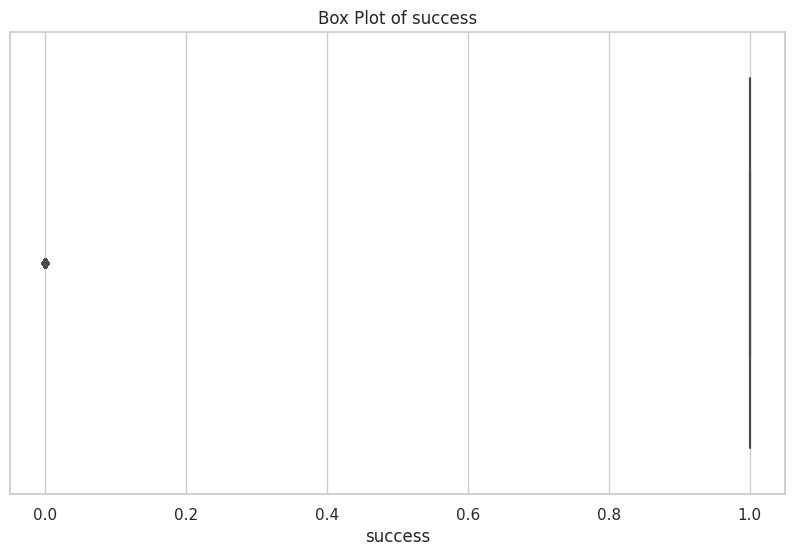

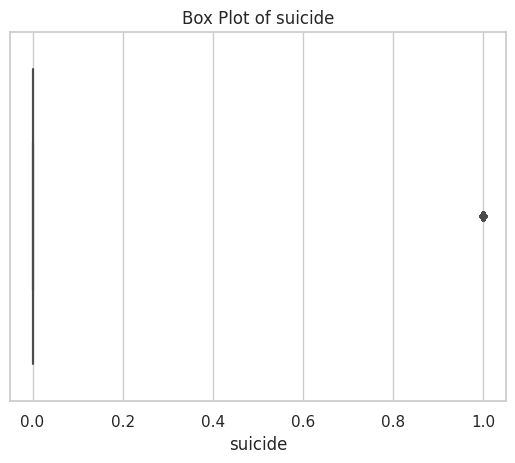

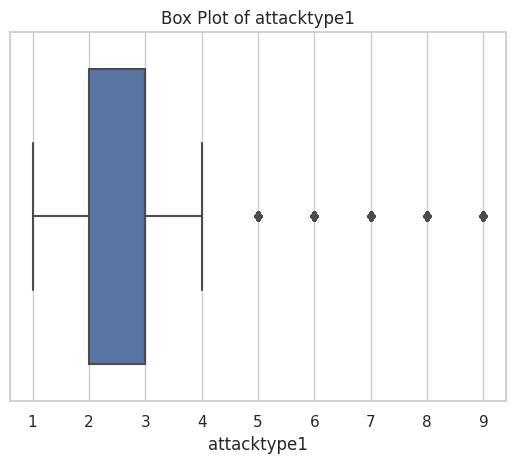

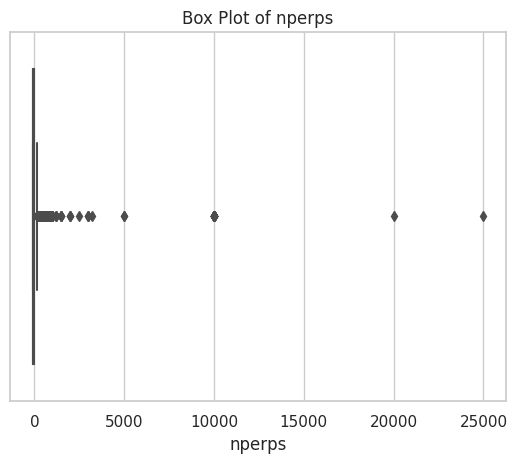

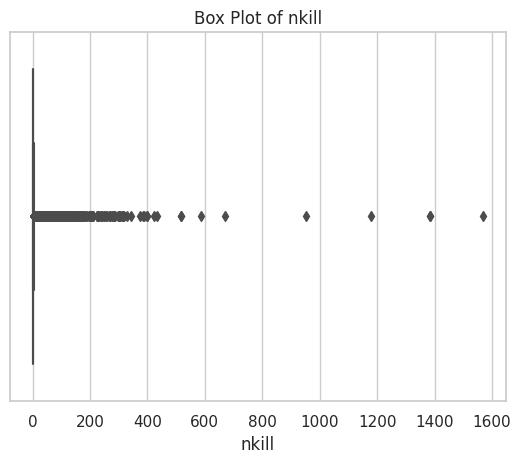

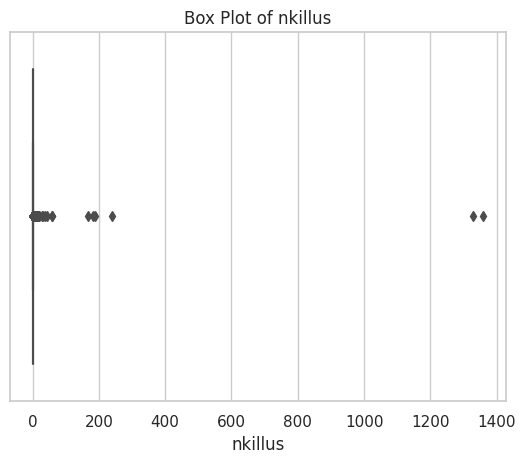

In [16]:
numeric_columns = new_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style of the plot
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

##### There is no much outlier as each attack has its propotion of nkills thus the outliers are viable and make sense

### dealing with missing Values

##### Decided to fill the missing values Nan with 0 for accuracy of the data since filing some sensistive coumns such as number of attackers with the mean would alter the accuracy of the analysis

In [17]:
new_df.fillna(0, inplace=True)

<ipython-input-17-f226b8ef039b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.fillna(0, inplace=True)


In [18]:
new_df.isnull().sum()

success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
target1             0
natlty1_txt         0
gname               0
gsubname            0
nperps              0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nkillus             0
dtype: int64

### Dealing with duplicates

##### All duplicated rows are dropped

In [19]:
new_df.drop_duplicates(inplace=True)

<ipython-input-19-3af26efaede6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop_duplicates(inplace=True)


## EDA

### Visualizing Types Of attack and its Frequency

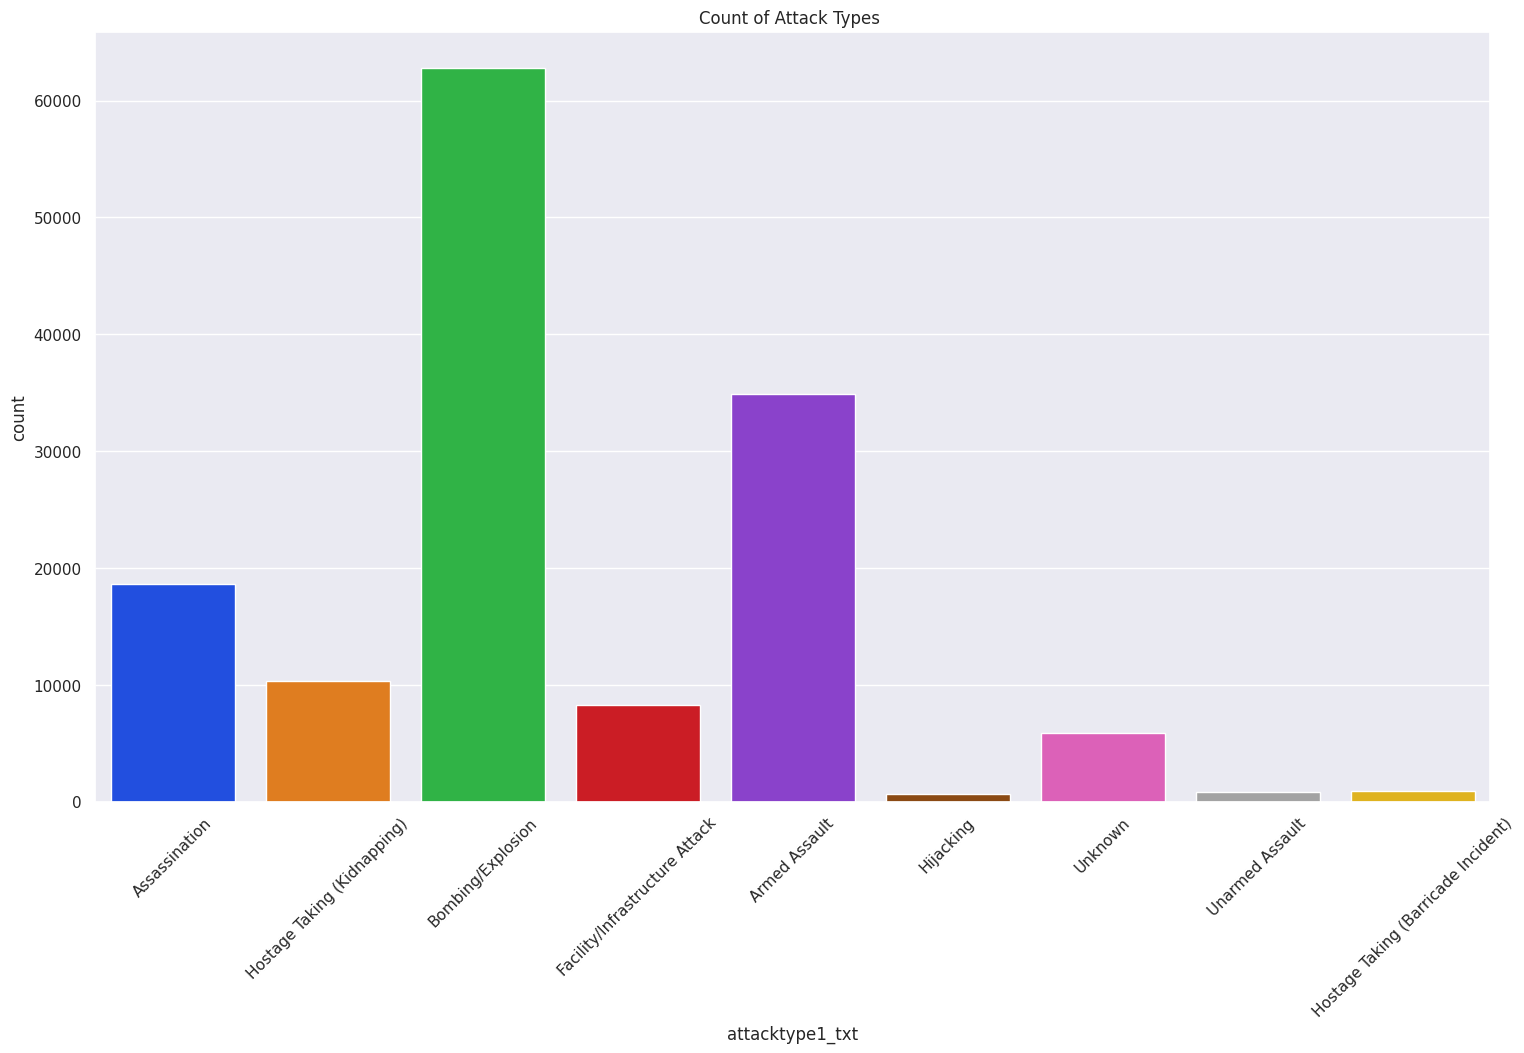

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(18, 10))
sns.set(style="darkgrid")
sns.countplot(data=new_df, x='attacktype1_txt', palette='bright')
plt.title('Count of Attack Types ')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

### Attack Type Per Nationality

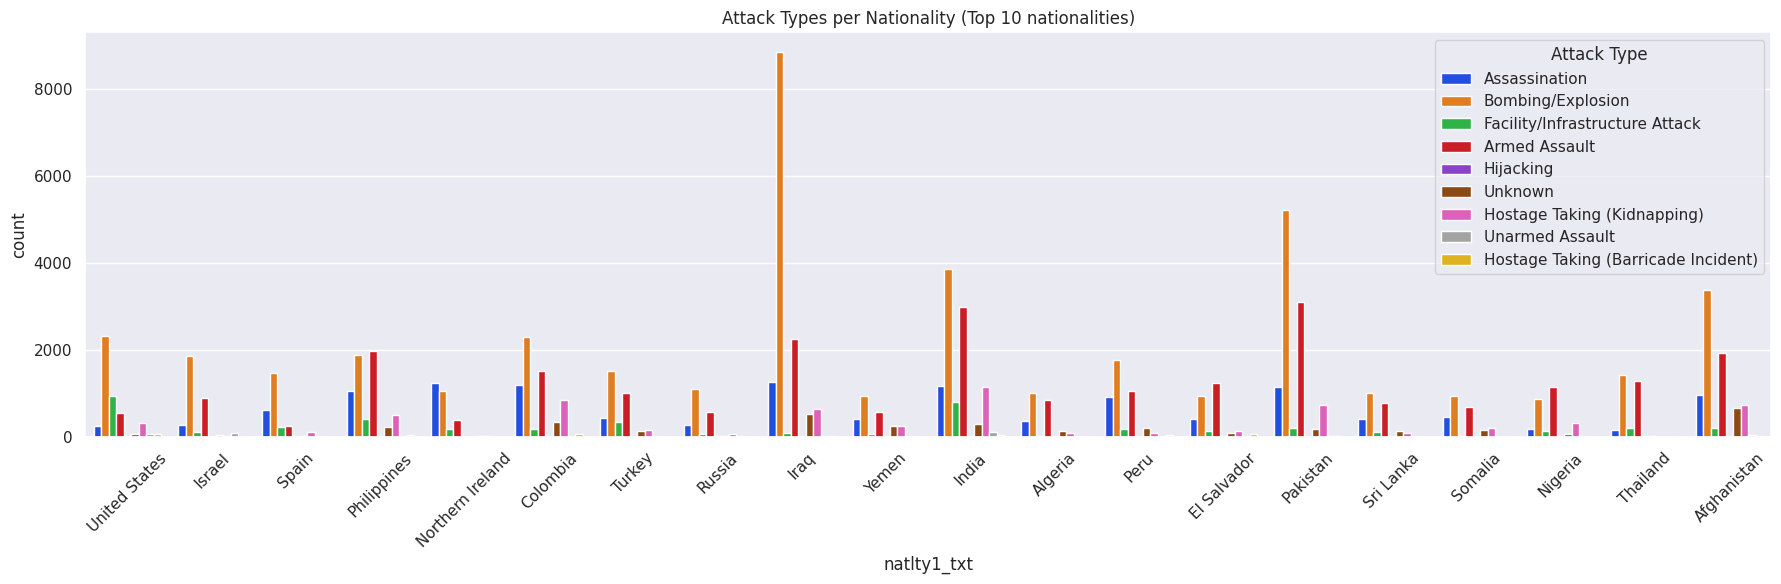

In [37]:
top_10_nationalities = new_df['natlty1_txt'].value_counts().head(20).index.tolist()

# Filter the DataFrame to include only the top 10 nationalities
df_top_10 = new_df[new_df['natlty1_txt'].isin(top_10_nationalities)]

# Create a countplot
plt.figure(figsize=(18, 6))
sns.set(style="darkgrid")
sns.countplot(data=df_top_10, x='natlty1_txt', hue='attacktype1_txt', palette='bright')
plt.title('Attack Types per Nationality (Top 10 nationalities)')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()

### Attack Per Group

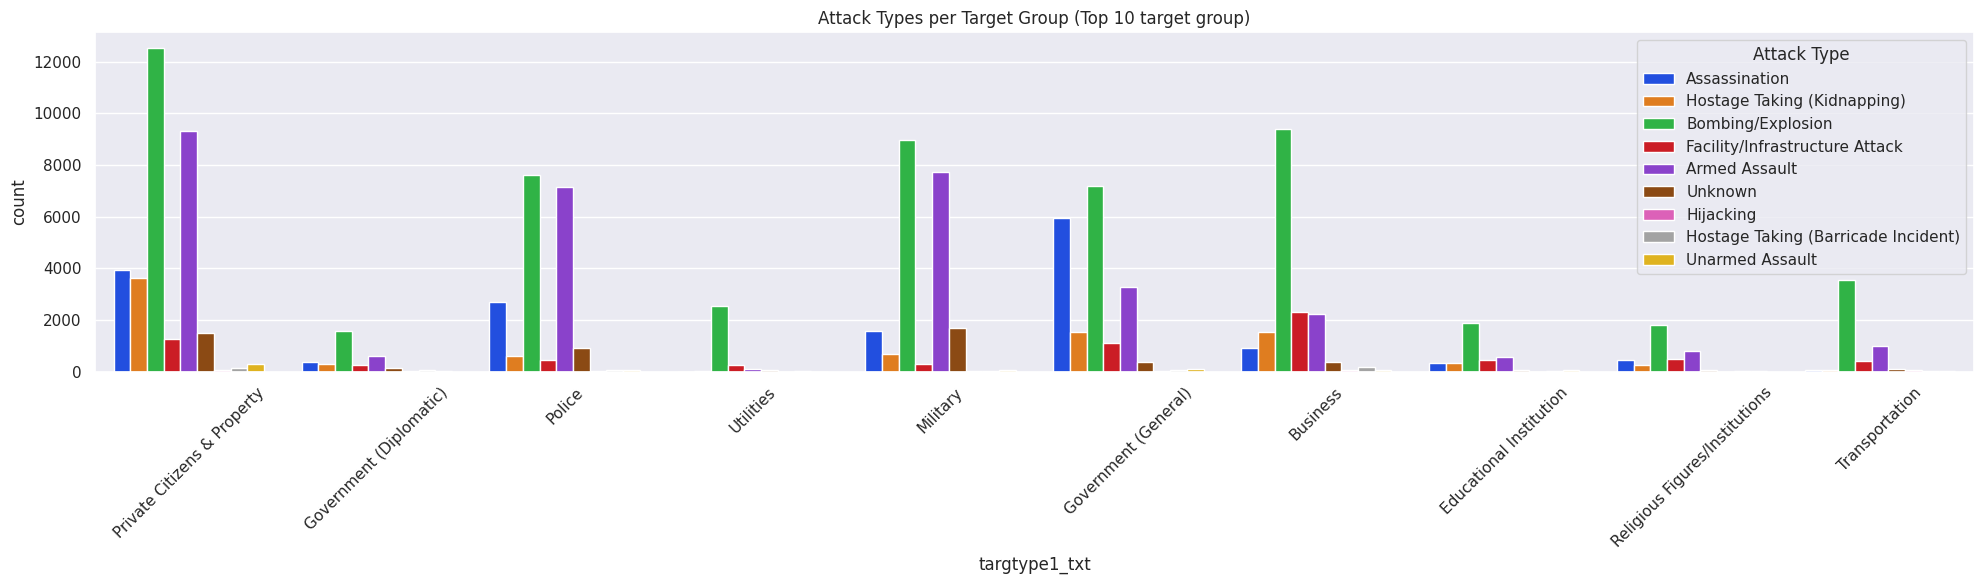

In [42]:
top_10_group = new_df['targtype1_txt'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 nationalities
df_top_10 = new_df[new_df['targtype1_txt'].isin(top_10_group)]

# Create a countplot
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
sns.countplot(data=df_top_10, x='targtype1_txt', hue='attacktype1_txt', palette='bright')
plt.title('Attack Types per Target Group (Top 10 target group)')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()

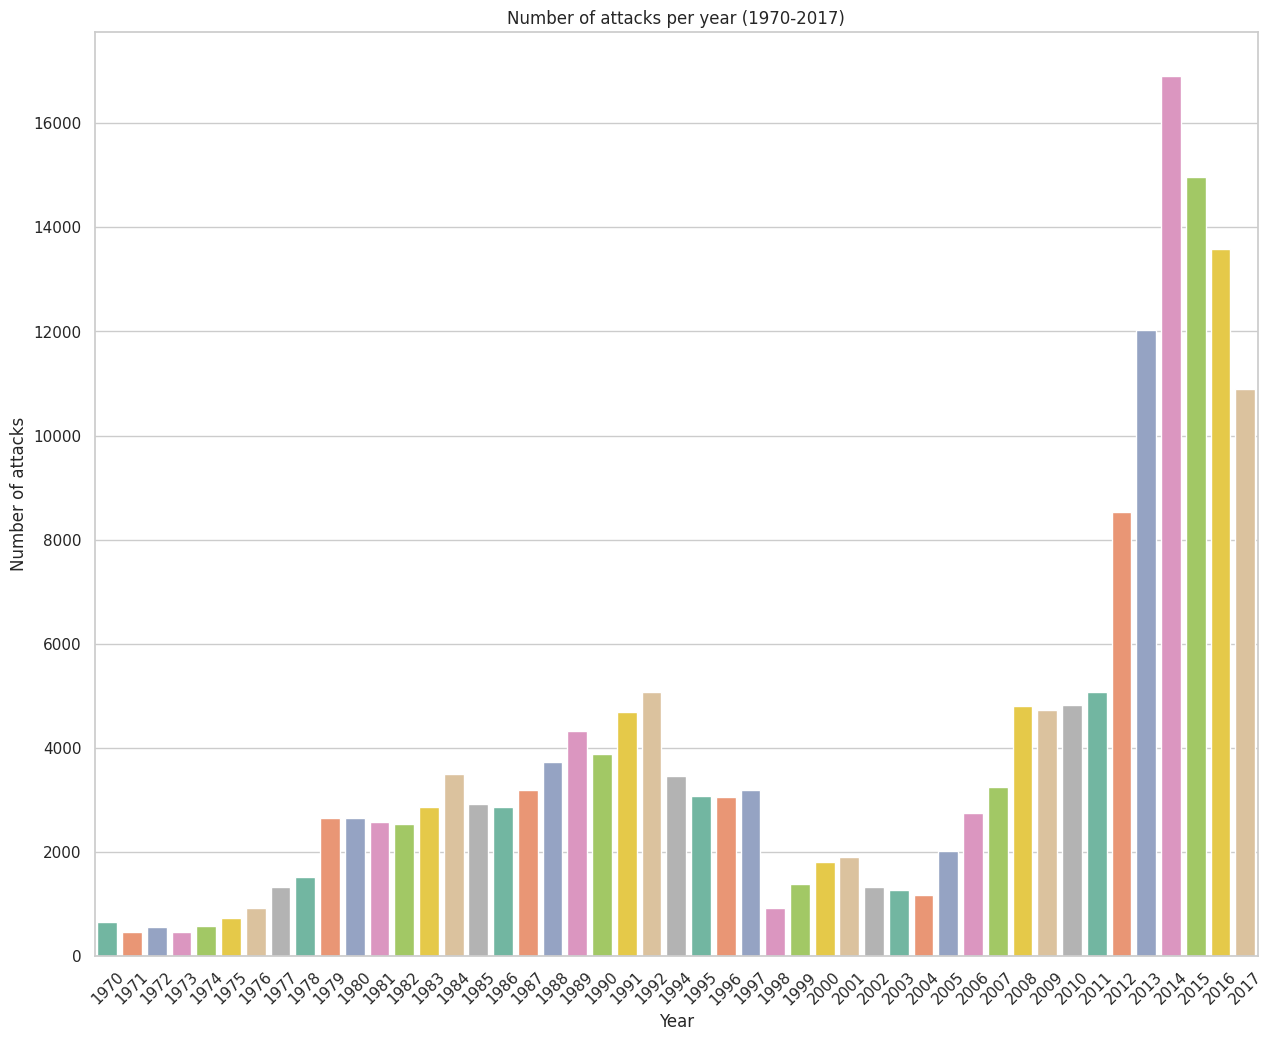

In [60]:
df = df.groupby(['iyear'], as_index=True)['eventid'].count().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")  # Set the style of the plot
sns.barplot(data=df, x='iyear', y='eventid', palette='Set2')  # Customize the palette as needed
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Number of attacks per year (1970-2017)')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.show()


## Statistical Analysis

#### correlation between attack type and number of people killed

In [61]:
correlation = new_df['attacktype1'].corr(new_df['nkill'])

print(f'Correlation between attacktype1 and nkill: {correlation}')

Correlation between attacktype1 and nkill: -0.0003575238651552964
